In [3]:
import pandas as pd

# Load the fake and real news data
fake = pd.read_csv("Fake.csv")
true = pd.read_csv("True.csv")

# Add labels
fake['label'] = 'FAKE'
true['label'] = 'REAL'

# Combine
data = pd.concat([fake, true], ignore_index=True)

# Save to a new file
data.to_csv("news.csv", index=False)


In [4]:
import os
print(os.path.exists("news.csv"))  # Should return True


True


In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
# 2. Load Dataset
df = pd.read_csv('news.csv')  # Ensure you have the dataset in the same folder
df = df.dropna()
df.head()


,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",FAKE
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",FAKE
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",FAKE
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",FAKE
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",FAKE


Number of fake news: 23481
Number of real news: 21417


<Axes: title={'center': 'Label Distribution'}, xlabel='label'>

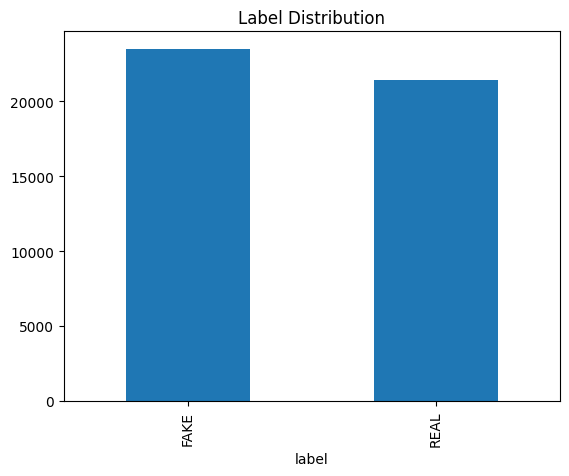

In [7]:
print("Number of fake news:", sum(df['label'] == 'FAKE'))
print("Number of real news:", sum(df['label'] == 'REAL'))
df['label'].value_counts().plot(kind='bar', title='Label Distribution')


In [8]:
X = df['text']
y = df['label']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.2, random_state = 42)

In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(stop_words = 'english', max_df = 0.7)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

In [12]:
model = PassiveAggressiveClassifier(max_iter=50)
model.fit(X_train_tfidf, y_train)

PassiveAggressiveClassifier(max_iter=50)

In [13]:
y_pred = model.predict(X_test_tfidf)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 99.43%


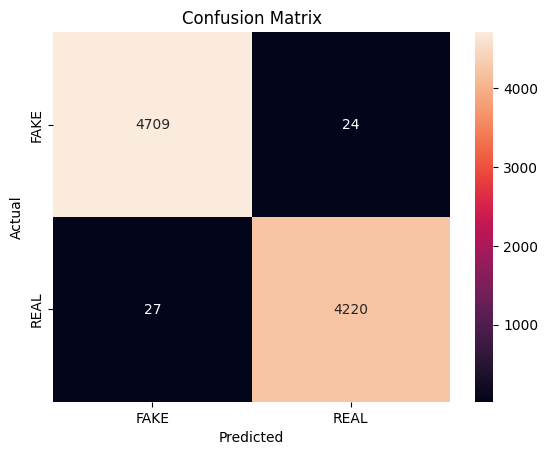

In [15]:
cm = confusion_matrix(y_test, y_pred, labels=['FAKE', 'REAL'])
sns.heatmap(cm, annot=True, fmt='d', xticklabels=['FAKE', 'REAL'], yticklabels=['FAKE', 'REAL'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()